In [1]:
import numpy as np
# statistical methods
from scipy import stats
# plotting methods
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
# includes matlab
import scipy.io
# to avoid warning - but be aware
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# not yet fixed in 0.20 by anaconda
import pandas as pd
# also existing in statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf


# GLM IV

- natürlicher Parameter und kanonische Link-Funktion
- Punktschätzer für Parametervektor $\boldsymbol\beta$
- Intervallschätzer
- Beispiele Normalverteilung und Binomialverteilung

## Wiederholung
- Zufallsvariable $Y$ mit Wahrscheinlichkeitsdichte $f(Y)$ aus der Exponentialfamilie
$$f(Y; \theta) = \exp\bigl(a(Y)b(\theta)+c(\theta)+d(Y)\bigr) \qquad (\text{Dobson Barnett 2008)}$$
$\star$对于任意的$Y$对应一个概率分布$f(Y)$,属于指数分布

- Verdichtete Information durch $k$ unabhängige Variablen mit Parametern $\boldsymbol\beta$: 
$$\mathcal{E}(\mathbf{Y}) = \boldsymbol\mu$$
$$g(\boldsymbol\mu)      = \boldsymbol\eta = \mathbf{X}\boldsymbol\beta$$

- MLE durch IRLS
    - Design-Matrix $\mathbf{X}$ mit unabhängigen Variablen
    - Score-Statistik $\mathbf{U}$
    - Informations-Matrix $\mathcal{I}$
    - Varianz-Kovarianz-Matrix $\mathbf{W}$
    - Daten $z_i = \sum_{k=1}^p x_{ik} b_{k}^{(m-1)} + (y_i-\mu_i)\frac{\partial \eta_i}{\partial \mu_i}$
        - Daten $z_i=\sum_{k=1}^{p} x_{ik}b_{k}+(y_i-\mu_i)\frac{\partial \eta_i}{\partial \mu_i}$ $\star$
    - $\mathbf{b}^{(m)} = \bigl(\mathbf{X}^T\mathbf{W}^{(m-1)}\mathbf{X}\bigr)^{-1}\mathbf{X}^T\mathbf{W}^{(m-1)}\mathbf{z}^{(m-1)}$

- Deviance $D = 2\bigl(l(\tilde{\boldsymbol\theta};\mathbf{y}) - l(\widehat{\boldsymbol\theta};\mathbf{y})\bigr)$
    - $\sim \chi^2$ für $Y\sim\mathcal{N}$

- Modellvergleich durch $\Delta D$
    - $\sim \chi^2(\Delta k)$ näherungsweise für $Y\sim$ Exponentialfamilie

Wahrscheinlichkeitsverteilungen aus der Exponentialfamilie $f(Y; \theta) = \exp\bigl(a(Y)b(\theta)+c(\theta)+d(Y)\bigr)$ 
## Kanonische Verteilung
Verteilungen mit 
$$a(Y)=Y$$
nennt man **kanonisch**.
- Normalverteilung, Poissonverteilung, Binomialverteilung sind kanonisch
- Erwartungswert und Varianz für $Y$ haben eine einfache Form
- Der Parameter $b(\theta)$ heißt **natürlicher Parameter**

| Verteilung  | natürlicher Param. $b(\theta)$       | Funktion $c(\theta)\qquad\qquad\quad$ | Funktion $d(y) \qquad\quad$ |
| ----------- | ------------------------- | ---------------- | ------------ |
| Normal(正态分布)      | $\frac{\mu}{\sigma^2}$    | $-\frac{\mu^2}{2\sigma^2}-\frac{1}{2}\ln(2\pi\sigma^2)$ | $-\frac{y^2}{2\sigma^2}$ |
| Binomial(二项分布)    | $\ln(\frac{\pi}{1-\pi})$ | $n \ln(1-\pi)$ | $\ln {n\choose y}$ |
| Poisson(泊松分布)     | $\ln \lambda$            | $-\lambda$       | $-\ln y!$    |


## Natürlicher Parameter
$$f(Y; \theta) = \exp\bigl(Y\cdot b(\theta)+c(\theta)+d(Y)\bigr)$$
Wählt man $b(\theta) = \theta$, dann heißt $\theta$ selbst der natürliche Parameter der Verteilung.
$$f(Y; \theta) = \exp\bigl(Y\theta+c(\theta)+d(Y)\bigr)$$
Möchte man diesen natürlichen Parameter selbst linear vorhersagen 
$$\theta = \mathbf{X}\boldsymbol\beta$$
so wird aus der allgemeinen Link-Funktion $g$:
$$g(\mu) = \mathbf{X}\boldsymbol\beta$$
die *natürliche Link-Funktion*
$$\theta=g(\mu)$$

| Verteilung  | natürlicher Param. $\theta=b(\theta)$ | Erwartungswert  | oder $\mu = g^{-1}(\theta)$ |
| ----------- | ----------------------------------| --------------- | ----------------------   |
| Normal      | $\theta = \frac{\mu}{\sigma^2}$   | $\mu = \mu$     | $\mu = \sigma^2\theta$   |
| Binomial    | $\theta = \ln(\frac{\pi}{1-\pi})$ | $\mu = n\pi$    | $\pi = \frac{e^{\theta}}{1+e^{\theta}}$     |
| Poisson     | $\theta = \ln \lambda$            | $\mu = \lambda$ | $\lambda = e^\theta$     |


## Vereinfachungen (化简)
Für kanonische Verteilung $a(Y)=Y$ und natürlichen Parameter $b(\theta)=\theta$ ergibt sich
$$f(Y; \theta) = \exp\bigl(Y\theta+c(\theta)+d(Y)\bigr)$$
Erwartungswert 期望
$$\begin{align} 
\mathcal{E}\left(a(Y)\right) &= -\frac{c'(\theta)}{b'(\theta)} \\
\mathcal{E}\left(Y\right)    &= -c'(\theta) \star
\end{align}$$
Varianz 方差
$$\begin{align} 
\text{Var}\left(a(Y)\right) &= \frac{b''(\theta)c'(\theta)-c''(\theta)b'(\theta)}{[b'(\theta)]^3} \\
\text{Var}\left(Y\right)    &= -c''(\theta) \star
\end{align}$$

| Verteilung  | natürlicher Param. $b(\theta)$       | c | c' | c'' |
| ----------- | ------------------------- | ---------------- | ------------ |
| Normal      | $\theta=\frac{\mu}{\sigma^2}$    | $-\frac{\sigma^2\theta^2}{2}-\frac{1}{2}\ln(2\pi\sigma^2)$ | $-\sigma^2\theta$ | $-\sigma^2$ |
| Binomial    | $\theta=\ln(\frac{\pi}{1-\pi})$ | $-n \ln (1+e^{\theta})$ | $- \frac{e^{\theta}}{1+e^{\theta}}$  | $-n\frac{e^{\theta}}{(1+e^{\theta})^2}$ |
| Poisson     | $\theta=\ln \lambda$            | $-e^{\theta}$       | $-e^{\theta}$    | $-e^{\theta}$  |


Quelle: Tabelle 2.1 aus McCullagh, Nelder: *Generalized Linear Models* 2nd 1989


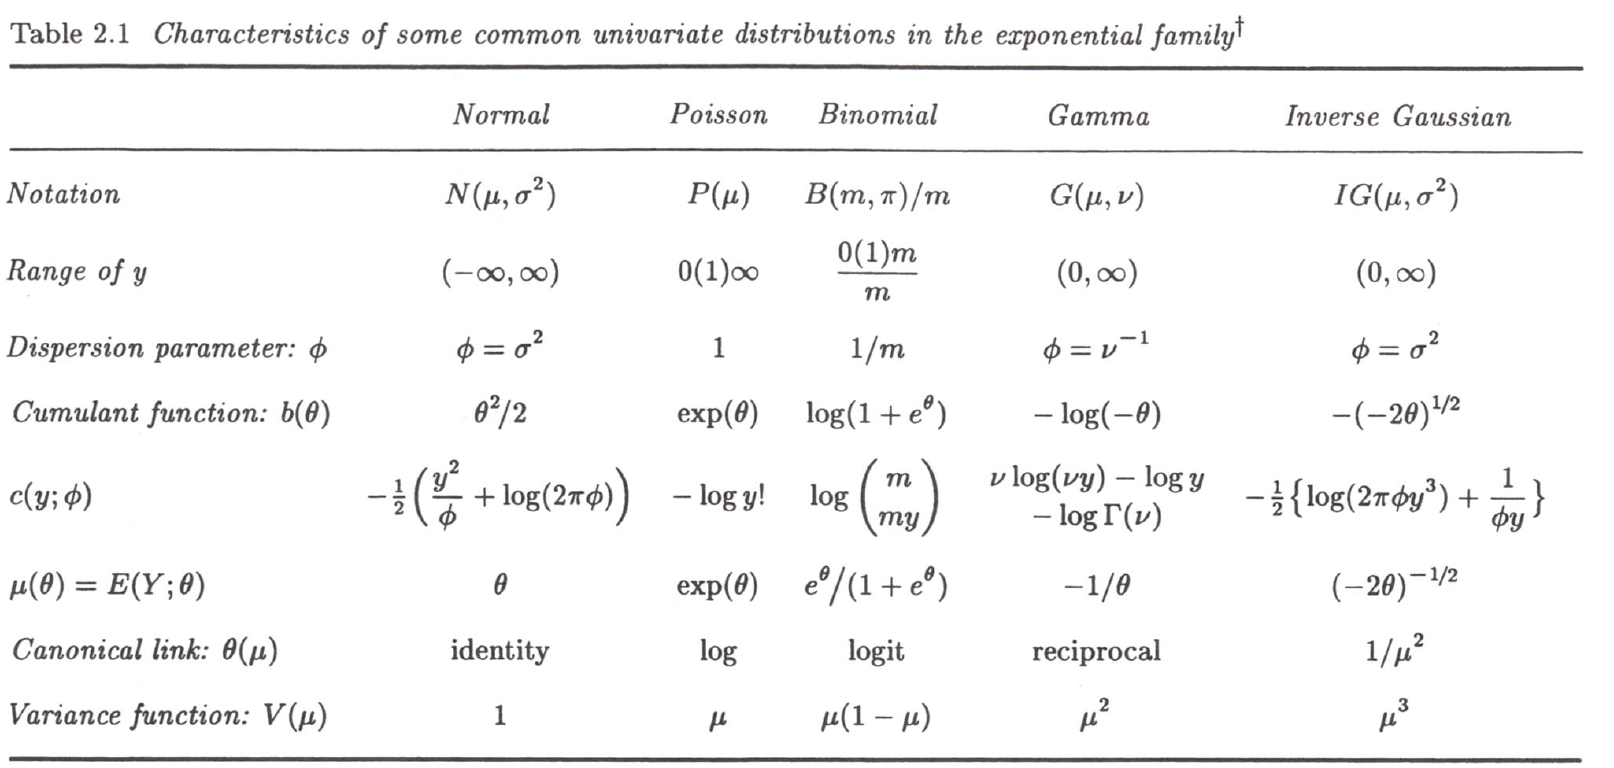

### Natürlicher Parameter und kanonischer Link
- ... ist in GLM immer für die passende Verteilung implementiert
$$\mathcal{E}\left(Y\right) = -c'(\theta)$$
- **Normal**-, **Poisson**- und **Binomialverteilung** haben passende Parameter
    - siehe Tabelle
- Andere Link-Funktionen sind eben so gut möglich

# Intervallschätzer 区间估计

## Beispiel Lineares Modell mit Normalverteilung
$$E(Y_i)=\mu_i\qquad g(\mu_i)=\mathbf{x}_i^T\boldsymbol\beta \qquad Y\sim\mathcal{N}(\mu_i, \sigma^2)$$
Mit der Link-Funktion *Identität*
$$g(\mu_i) = \mu_i$$
können alle Mittelwerte abgespalten werden:
$$\mathbf{Y} = \mathbf{X}\boldsymbol\beta + \boldsymbol\epsilon$$
mit unabhängigen $i=1\dots n$ Zufallsvariablen $$\epsilon_i \sim \mathcal{N}(0, \sigma^2)$$
#### = verbleibender additiver Zufall/Fehler/Rauschen 
mit bekannter Verteilung

## Statistische Methoden
Ist die Zufallsvariable $X$ Normal-verteilt  mit Erwartungswert $\mu$ und Standardabweichung $\sigma$
$$X\sim \mathcal{N}(\mu, \sigma^2)$$
dann ist die *standardisierte* Zufallsvariable Standard-Normalverteilt:
$$\frac{X-\mathcal{E}(X)}{\mathrm{std(X)}} \sim \mathcal{N}(0, 1)  \star$$
Gleichbedeutend
$$\frac{\bigl(X-\mathcal{E}(X)\bigr)^2}{\mathrm{Var}(X)} \sim \chi^2(1)  \star$$

Näherungsweise (Zentraler Grenzwertsatz) wenn eine große Anzahl $n$ an Daten zu $X=\sum_{i=1}^n X_i$ beitragen.

Sind mehrere Zufallsvariablen $X_i, \; i\in[1\dots k]$, zusammengefaßt im Vektor $\mathbf{X}$, dann schreibt sich die standardisierte Quadratfehlersumme mit der (nicht singulären, umkehrbaren) Varianz-Kovarianz-Matrix $\mathbf{V}$ als
$$\bigl(\mathbf{X}-\mathcal{E}(\mathbf{X})\bigr)^T \mathbf{V}^{-1} \bigr(\mathbf{X}-\mathcal{E}(\mathbf{X})\bigl) \sim \chi^2(k)$$
und ist $\chi^2$-verteilt.

Insbesondere für i.i.d. Zufallsvariable mit $\;V_{i,i} = \mathrm{Var}(X);\quad V_{j,i\neq j}=0$:
$$\frac{1}{\mathrm{Var}(X)}\sum_{i=1}^{k} \bigl(X_i-\mathcal{E}(X_i)\bigr)^2 \sim \chi^2(k)$$

## Max-Likelihood-Schätzer für $\beta$
#### GLM
$$\mathcal{E}(Y_i) = \mu_i\quad g(\mu_i)=\mathbf{x}_i^T\boldsymbol\beta = \eta_i$$
mit $k$ Parametern $\beta_j$ gewonnen per IRLS
#### Erinnerung: 1. Teilergebnis
$\star$Die vektorielle ***score***-Statistik
$$U_j = \frac{\partial l}{\partial \beta_j} = \sum_{i=1}^{n} \bigl( \frac{y_i-\mu_i}{\text{Var}(Y_i)}\;x_{ij}\;\frac{\partial \mu_i}{\partial \eta_i} \bigr)$$
Da $\mathcal{E}(Y_i)=\mu_i\; \forall i\;$, ist
$$\mathcal{E}(U_j) = 0\quad \forall j$$
wie bekannt.

Die Varianz-Kovarianz-Matrix für $\mathbf{U}$ ist
$$\mathcal{I}_{jk} = \mathcal{E}(U_j\;U_k)$$
mit
$$\begin{align}
\mathcal{I}_{jk} &= \mathcal{E}\biggl( \sum_{i=1}^{n} \bigl( \frac{y_i-\mu_i}{\text{Var}(Y_i)}\;x_{ij}\;\frac{\partial \mu_i}{\partial \eta_i} \bigr)\sum_{i=1}^{n} \bigl( \frac{y_i-\mu_i}{\text{Var}(Y_i)}\;x_{ik}\;\frac{\partial \mu_i}{\partial \eta_i} \bigr)\biggr) \\
 &= \sum_{i=1}^{n}\frac{\mathcal{E}\bigl((Y_i-\mu_i)^2\bigr)x_{ij}x_{ik}}{\bigl(\text{Var}(Y_i)\bigr)^2}\bigl(\frac{\partial\mu_i}{\partial \eta_i}\bigr)^2
\end{align}$$

Damit hat die Standardisierte Quadratfehlersumme für den Score-Vektor $\mathbf{U}$, mit Erwartungswert $\mathcal{E}(U_j) = 0$ die Verteilung
$$\mathbf{U}^T\mathcal{I}^{-1}\,\mathbf{U} \sim \chi^2(k) \star$$
exakt für Normalverteilte $Y$, näherungsweise für große Stichproben.

## Beispiel 1: Normalverteilung
Seien $Y_i$ i.i.d. normalverteilte Zufallsvariablen $y_i \sim \mathcal{N}(\mu, \sigma^2)$ mit bekannter Varianz $\sigma^2$ und gesuchtem Parameter $\mu$.
$$l = -\frac{1}{2\sigma^2}\sum_{i=1}^{n}(y_i-\mu)^2-n\log{(\sigma\sqrt{2\pi})}$$
Die *score*-Statistik ist
$$U=\frac{\partial l}{\partial \mu} = \frac{1}{\sigma^2}\sum_{i=1}^{n}(Y_i-\mu) = \frac{n}{\sigma^2}(\overline{Y}-\mu)$$
woraus man den Punktschätzer erhält
$$\widehat\mu = \overline{Y}$$
Dann
$$\mathcal{E}(U) = \frac{1}{\sigma^2}\sum_{i=1}^{n}\bigl(\mathcal{E}(Y_i)-\mu\bigr) = 0$$
$$\text{Var}(U) = \mathcal{I} = \frac{1}{\sigma^4}\sum_{i=1}^{n}\text{Var}(Y_i) = \frac{n}{\sigma^2}$$

Damit ist
$$\mathbf{U}^T \mathcal{I}^{-1}\mathbf{U} \sim \chi^2(p) = \frac{U^2}{\mathcal{I}} = \frac{(\overline{Y}-\mu)^2}{\sigma^2/n} \sim \chi^2(1)$$
Allgemein: $$\mathbf{U}^T \mathcal{I}^{-1}\mathbf{U} \sim \chi^2(p) \star$$
Damit ist:$$\frac{U^2}{\mathcal{I}} = \frac{(\overline{Y}-\mu)^2}{\sigma^2/n} \sim \chi^2(1) \star$$
ein exaktes Ergebnis für $\widehat\mu$.
Also liegt auch das 95%-Konfidenzintervall für $\widehat\mu$ fest:
$$\overline{y}\pm \Phi_{(1-\alpha/2)}\frac{\sigma}{\sqrt{n}}$$

## Ergebnis
Mit der *Generalized Linear Models* Methode läßt sich das Konfidenzintervall für den Schätzer $\widehat\mu$ genauso bestimmen, wie mit klassischer Verteilungsannahme.

## Beispiel 2: Binomialverteilung
Seien $Y_i$ i.i.d. binomialverteilte Zufallsvariablen $y_i \sim \mathcal{B}(n, \pi)$
$$l(\pi;y) = y\ln\pi + (n-y)\ln (1-\pi) + ln({n \choose y})$$
Die *score*-Statistik ist
$$U=\frac{\partial l}{\partial \pi} = \frac{Y}{\pi} - \frac{n-Y}{1-\pi} = \frac{Y-n\pi}{\pi(1-\pi)}$$
Mit $\mathcal{E}(Y) = n\pi$  ergibt sich wieder 
$$\mathcal{E}(U) = 0$$
Mit $\mathrm{Var}(Y) = n\pi(1-\pi)$  ergibt sich
$$\text{Var}(U) = \mathcal{I} = \frac{1}{\pi^2(1-\pi)^2}\mathrm{Var}(Y) = \frac{n}{\pi(1-\pi)}$$
Je grossre die Umfang, desto grossser die Varanz $\star$

Damit ist
$$\frac{\mathbf{U}}{\sqrt{\mathcal{I}}} = \frac{Y-n\pi}{\sqrt{n\pi(1-\pi)}} \sim \mathcal{N}(0, 1)$$
näherungsweise und die bekannte Normal-Näherung für binomialverteilte Zufallsvariablen

# Allgemeine Intervallschätzung 总体区间估计

## Einschub: Reihenentwicklung nach Taylor
Jede glatte Funktion f(x) läßt sich nach Taylor als Reihe ihrer Ableitungen um eine Stelle $x_0$ entwickeln
$$f(x) = f(x_0) + (x-x_0)\frac{\text{d}f}{\text{d}x}\Bigr|_{x=x_0} + \frac{1}{2}(x-x_0)^2\frac{\text{d}^2f}{\text{d}x^2}\Bigr|_{x=x_0} + \dots$$

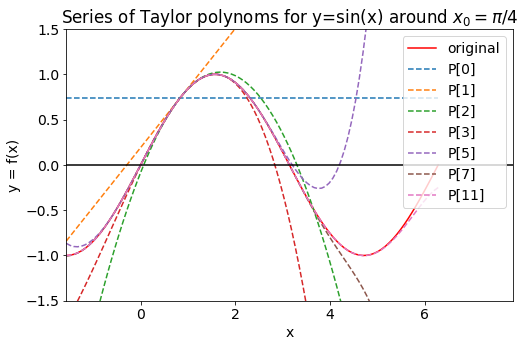

In [4]:
'''
visualize Taylor polynoms
'''
from scipy.interpolate import approximate_taylor_polynomial

plt.figure(figsize=(8,5))
# ROI for x
x = np.linspace(-np.pi/2, 2*np.pi, 100)              

# center value for approximation
x0 = np.pi/4.                                        

# the original sin function
plt.plot(x, np.sin(x), 'r-', label='original')       
plt.axis((-np.pi/2, 2.5*np.pi, -1.5, 1.5))

# cycle through polynoms of order i
for deg in [0, 1, 2, 3, 5, 7, 11]:                   
    po = approximate_taylor_polynomial(
        np.sin, x0, deg, min(np.exp(deg-3), (deg+1)/4))
    plt.plot(x, po(x-x0), linestyle='--', label='P[{}]'.format(deg))
plt.plot([-2, 10], 2*[0], 'k-')
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.title('Series of Taylor polynoms for y=sin(x) around $x_0=\pi/4$')
plt.legend(loc='upper right');


## Taylor-Entwicklung Log-Likelihood
(erste drei Terme) der Log-Likelihood für einen **skalaren** Parameter $\beta$ um die Stelle $\beta=b$
$$\begin{align}
l(\beta) &= l(b) + (\beta-b)U(b) + \frac{1}{2}(\beta-b)^2U'(b) + \dots \\
\;       &\approx l(b) + (\beta-b)U(b) - \frac{1}{2}(\beta-b)^2\mathcal{I}(b)
\end{align}$$
und für einen Parameter**vektor** $\boldsymbol\beta$
$$l(\boldsymbol\beta) \approx l(\mathbf{b}) + (\boldsymbol\beta-\mathbf{b})U(\mathbf{b}) - \frac{1}{2}(\boldsymbol\beta-\mathbf{b})^T\mathcal{I}(\mathbf{b})(\boldsymbol\beta-\mathbf{b}) \star$$

Taylor-Entwicklung (erste zwei Terme) der *Score*-Statistik
$$\mathbf{U}(\boldsymbol\beta) \approx \mathbf{U}(\mathbf{b}) - \mathcal{I}(\mathbf{b})\,(\boldsymbol\beta-\mathbf{b})$$

## Verteilung  für ML-Schätzer
Der Schätzer $\mathbf{b} = \widehat{\boldsymbol\beta}$ maximiert $l(\boldsymbol\beta)$ mit $\mathbf{U}(\mathbf{b})=0$.
Damit $$\mathbf{U}(\boldsymbol\beta) = -\mathcal{I}(\mathbf{b})\,(\boldsymbol\beta-\mathbf{b})$$
bzw. $$(\mathbf{b}-\boldsymbol\beta) = \mathcal{I}^{-1}\mathbf{U}(\boldsymbol\beta)$$

Sieht man $\mathcal{I}$ als konstant an, dann ist wegen  $\mathcal{E}(\mathbf{U})=0$ auch 
$$\mathcal{E}(\mathbf{b}) = \boldsymbol\beta$$
also $\mathbf{b}$ ein (asymptotisch) erwartungstreuer Schätzer für $\boldsymbol\beta$

Die Varianz-Kovarianz-Matrix für $\mathbf{b}$ ist damit
$$\mathcal{E}\bigl((\mathbf{b}-\boldsymbol\beta)(\mathbf{b}-\boldsymbol\beta)^T\bigr) = \mathcal{I}^{-1}\mathcal{E}(\mathbf{UU}^T)\mathcal{I}^{-1} = \mathcal{I}^{-1}$$
wegen $\mathcal{I}=\mathcal{E}(\mathbf{UU}^T)$  und $(\mathcal{I}^{-1})^T=\mathcal{I}^{-1}$ (Symmetrie)

Mit dieser Varianz-Kovarianz-Matrix $\mathbf{V} = \mathcal{I}^{-1}$ ergibt sich für die standardisierte Quadratfehlersumme (asymptotisch)
$$(\mathbf{b}-\boldsymbol\beta)^T \mathcal{I}(\mathbf{b})(\mathbf{b}-\boldsymbol\beta)\sim \chi^2(p)$$
die ***Wald***-Statistik;

in der eindimensionalen Form die bekannte
$$b \sim \mathcal{N}(\beta, \mathcal{I}^{-1})$$

## Ergebnis
Der Punktschätzer $\widehat{\boldsymbol\beta}$ des Parameters $\boldsymbol\beta$ ist (näherungsweise) verteilt
$$\widehat{\boldsymbol\beta} \sim \mathcal{N}(\beta, \mathcal{I}^{-1})$$
mit der Informationsmatrix (Fischer Information) $\mathcal{I}$
$$\begin{align}
\mathcal{I}_{jk} &= \mathcal{E}(U_j\;U_k) \\
 &= \sum_{i=1}^{n}\frac{\mathcal{E}\bigl((Y_i-\mu_i)^2\bigr)x_{ij}x_{ik}}{\bigl(\text{Var}(Y_i)\bigr)^2}\bigl(\frac{\partial\mu_i}{\partial \eta_i}\bigr)^2
\end{align}$$

## Beispiel Normalverteilung
$$\mathcal{E}(Y_i) = \mu_i = \mathbf{x}^T_i \boldsymbol\beta\;;\quad Y_i\sim\mathcal{N}(\mu_i, \sigma^2)$$
Die Information hat (Link: Identität, $\mathrm{Var}(Y_i)=\sigma^2$) die einfache Form
$$\mathcal{I}_{jk} = \sum_{i=1}^n \frac{x_{ij}x_{ik}}{\sigma^2}$$
oder
$$\mathcal{I} = \frac{1}{\sigma^2}\mathbf{X}^T\mathbf{X}$$
Für die rechte Seite von $\quad\mathbf{X}^T\mathbf{W}\mathbf{X}\mathbf{b}^{(m)} = \mathbf{X}^T\mathbf{W}\mathbf{z}\quad$ war
$$z_i = \sum_{k=1}^p x_{ik}b_k^{(m-1)} + (y_i - \mu_i)$$
Da $\mu_i\big|_{b^{(m-1)}} = \mathbf{x}^T_i \mathbf{b}^{(m-1)} = \sum_{k=1}^p x_{ik}b_k^{(m-1)}$ verbleibt
$$z_i = y_i$$

Damit wird das zu lösende LGS $\quad\mathbf{X}^T\mathbf{W}\mathbf{X}\mathbf{b}^{(m)} = \mathbf{X}^T\mathbf{W}\mathbf{z}\quad$ zu
$$\frac{1}{\sigma^2}\mathbf{X}^T\mathbf{X}\mathbf{b} = \frac{1}{\sigma^2}\mathbf{X}^T\mathbf{y}$$
also
$$\mathbf{b} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$
der aus `OLS` bekannte Maximum-Likelihood-Schätzer für den Parametervektor $\boldsymbol\beta$

#### Punktschätzer
Mit $\mathbf{y} \sim mv\mathcal{N}(\mathbf{X}\boldsymbol\beta, \sigma^2\mathbb{1})$ wird der Erwartungswert
$$\mathcal{E}(\mathbf{b}) = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{X}\boldsymbol\beta = \boldsymbol\beta$$
und $\mathbf{b}$ ein erwartungstreuer Schätzer für $\boldsymbol\beta$

$$\mathbf{b} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$
#### Intervallschätzer
Mit 
$$\begin{align}
(\mathbf{b}-\boldsymbol\beta) &= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} - \boldsymbol\beta \\
\; &= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T(\mathbf{y} - \mathbf{X}\boldsymbol\beta)
\end{align}$$
folgt die Varianz-Kovarianz-Matrix für $\mathbf{b}$
$$\begin{align}
\mathcal{E}\bigl((\mathbf{b}-\boldsymbol\beta) (\mathbf{b}-\boldsymbol\beta)^T \bigr) &= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathcal{E}\bigl((\mathbf{y} - \mathbf{X}\boldsymbol\beta)(\mathbf{y} - \mathbf{X}\boldsymbol\beta)^T    \bigr) \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1} \\
\; &= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\bigl(\text{Var}(\mathbf{y})\bigr) \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1} \\
\; &= \sigma^2(\mathbf{X}^T\mathbf{X})^{-1} \\
\; &= \mathcal{I}^{-1}
\end{align}$$
wie bereits bekannt.

## Ergebnis Intervallschätzer Normalverteilung
Sind die Meßwerte $\mathbf{y}$ normalverteilt, sind es auch die Schätzer für die Parameter des linearen Modells, also
$$\mathbf{b} \sim \mathcal{N}(\boldsymbol\beta, \mathcal{I}^{-1})$$
oder für die standardisierte Quadratfehlersumme
$$(\mathbf{b}-\boldsymbol\beta)^T \mathcal{I} \,(\mathbf{b}-\boldsymbol\beta) \sim \chi^2(k) $$
wie aus der klassischen Statistik bekannt.

# Ergebnis für GLM
Der GLM-Formalismus reproduziert die von der Normalverteilung bekannten Ergebnisse

Diese sind näherungsweise für andere Verteilungen anwendbar.

Methoden sind implementiert in `statsmodels` `GLM`.